## Excercise 8.17, Page 402 {-}

#### A.

In this problem, we solve the differential equations for the Brusselator model using the adaptive Bulirsch-Stoer method.  The Brusselator is a model for a type of autocatalytic reaction.  The differential equations for the Brusselator are given by:  


$\frac{dx}{dt} = 1 - (b + 1)x + ax^2y$  



$\frac{dy}{dt} = bx - ax^2y$  


where  $x$ and $y$ represent concentrations of chemicals, and $a$ and $b$ are positive constants.



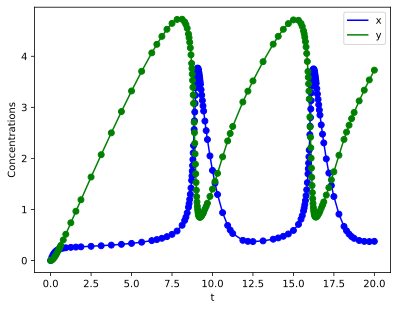

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

plt.close('all')


# Constants
a = 1
b = 3
x_0 = 0
y_0 = 0
delta = 10 ** -10  # target accuracy per unit time
t_0 = 0
t_f = 20
max_val = 1e6  # Maximum allowed value for x and y to prevent overflow

def fx(x, y):
    """
    Calculate the derivative of x with respect to time.
    """
    return 1 - (b + 1) * x + a * x ** 2 * y

def fy(x, y):
    """
    Calculate the derivative of y with respect to time.
    """
    return b * x - a * x ** 2 * y

def f(r):
    """
    Calculate the derivatives for the system at a given point.
    """
    x = np.clip(r[0], -max_val, max_val)
    y = np.clip(r[1], -max_val, max_val)
    return np.array([fx(x, y), fy(x, y)], float)

def modified_midpoint_step(r, H, n):
    """
    Perform the modified midpoint step with n steps.
    """
    r = np.copy(r)
    h = H / n
    k = r + 0.5 * h * f(r)
    r += h * f(k)
    for i in range(n - 1):
        k += h * f(r)
        r += h * f(k)
    return 0.5 * (r + k + 0.5 * h * f(r))

def R_n_m(R2, R1, n, m):
    """
    Calculate the Richardson extrapolation R_n,m.
    """
    return R2[m - 2] + (R2[m - 2] - R1[m - 2]) / ((n / (n - 1)) ** (2 * (m - 1)) - 1)

def calculate_row_n(r, t, H, R1, n, tpoints, xpoints, ypoints):
    """
    Calculate the n-th row of the Richardson extrapolation table.
    """
    if n > 8:
        r1 = Bulirsch_Stoer_step(r, t, H / 2, tpoints, xpoints, ypoints)
        return Bulirsch_Stoer_step(r1, t + H / 2, H / 2, tpoints, xpoints, ypoints)
    else:
        R2 = [modified_midpoint_step(r, H, n)]
        for m in range(2, n + 1):
            R2.append(R_n_m(R2, R1, n, m))
        R2 = np.array(R2, float)
        error_vector = (R2[n - 2] - R1[n - 2]) / ((n / (n - 1)) ** (2 * (n - 1)) - 1)
        error = np.sqrt(error_vector[0] ** 2 + error_vector[1] ** 2)
        target_accuracy = H * delta
        if error < target_accuracy:
            tpoints.append(t + H)
            xpoints.append(R2[n - 1][0])
            ypoints.append(R2[n - 1][1])
            return R2[n - 1]
        else:
            return calculate_row_n(r, t, H, R2, n + 1, tpoints, xpoints, ypoints)

def Bulirsch_Stoer_step(r, t, H, tpoints, xpoints, ypoints):
    """
    Perform a Bulirsch-Stoer step.
    """
    return calculate_row_n(r, t, H, np.array([modified_midpoint_step(r, H, 1)], float), 2, tpoints, xpoints, ypoints)

def solution(t_0, t_f):
    """
    Solve the differential equations using the Bulirsch-Stoer method.
    """
    r = np.array([x_0, y_0], float)
    tpoints = [t_0]
    xpoints = [r[0]]
    ypoints = [r[1]]
    Bulirsch_Stoer_step(r, t_0, t_f - t_0, tpoints, xpoints, ypoints)
    return tpoints, xpoints, ypoints

def main():
    t, x, y = solution(t_0, t_f)
    plt.plot(t, x, 'b', label='x')
    plt.plot(t, y, 'g', label='y')
    plt.plot(t, x, 'bo')
    plt.plot(t, y, 'go')
    plt.xlabel('t')
    plt.ylabel('Concentrations')
    plt.legend()
    plt.show()

if __name__=='__main__':
    main()
